# HW1:  Multinomial Naive Bayes Classifier

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

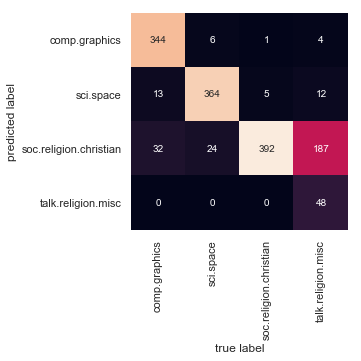

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [10]:
predict_category('sending a payload to the ISS')

'sci.space'

In [11]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [12]:
predict_category('determining the screen resolution')

'comp.graphics'

# HW2: Wine Classifier

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [93]:
wine = pd.read_csv('Wine.csv')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [94]:
wine.isnull().sum() #NA 확인->없음

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [95]:
wine.columns = ['class','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
wine.head(5)

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


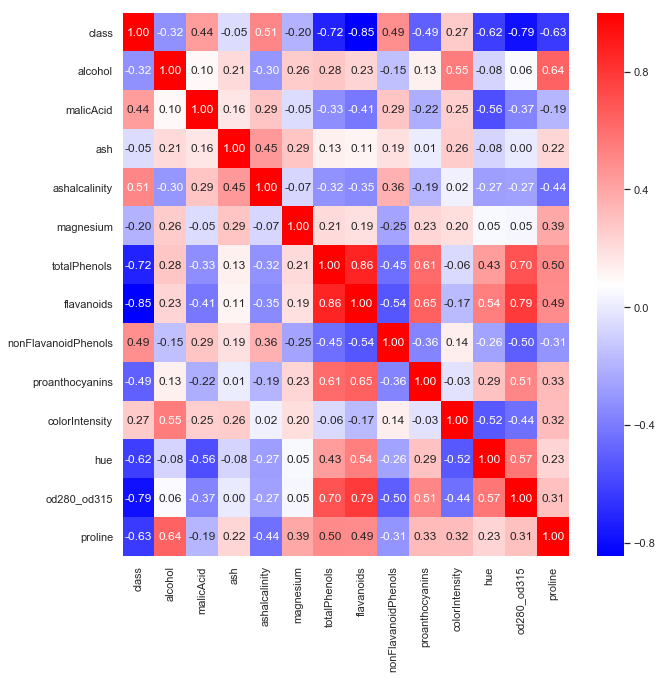

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, ax=ax, fmt='.2f', cmap='bwr')

In [97]:
#feature selection
X = wine[wine.columns.difference(['class'])]
y = wine['class']

In [98]:
from sklearn.feature_selection import SelectKBest, f_classif

In [99]:
Select_X = SelectKBest(score_func=f_classif, k=5).fit_transform(X, y)
X = Select_X 

In [100]:
X_wine = pd.DataFrame(X)

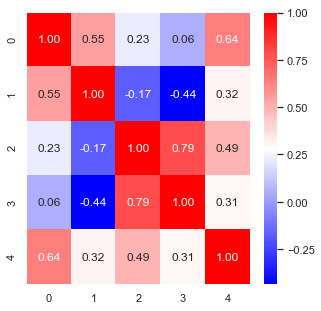

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(X_wine.corr(), annot=True, fmt='.2f', cmap='bwr')

In [102]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(141, 5) (141,)
(36, 5) (36,)


In [103]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
print("LDA Train Score", clf_lda.score(X_train,y_train))
print("LDA Test Score", clf_lda.score(X_test, y_test))

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
print('QDA train Score: ', clf_qda.score(X_train,y_train))
print("QDA Test Score", clf_qda.score(X_test, y_test))

LDA Train Score 0.9716312056737588
LDA Test Score 0.9722222222222222
QDA train Score:  0.9787234042553191
QDA Test Score 1.0


In [105]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, y_train)
print('Logistic Train Score:', logistic.score(X_train, y_train))
print('Logistic Test Score:', logistic.score(X_test, y_test))

Logistic Train Score: 0.9078014184397163
Logistic Test Score: 0.8611111111111112


In [106]:
#Logistic Regression with feature expansion #음 안해도 될 것 같음
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(X_train)
    Log = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto')
    kcv_score = cross_val_score(Log, X_poly, y_train.values.ravel(), cv=5) 
    print('kcv_score_degree =',i, ':', round(kcv_score.mean(),3))

kcv_score_degree = 1 : 0.887
kcv_score_degree = 2 : 0.88
kcv_score_degree = 3 : 0.603


In [107]:
#Test MSE #?? 뭔가 잘못된것 같다...
from sklearn.metrics import mean_squared_error as mse
lda_test_mse = mse(y_test, clf_lda.predict(X_test))
qda_test_mse = mse(y_test, clf_qda.predict(X_test))
logistic_test_mse = mse(y_test, logistic.predict(X_test))
print('LDA Test MSE:', lda_test_mse)
print('QDA Test MSE:', qda_test_mse)
print('Logistic Test MSE:', logistic_test_mse)

LDA Test MSE: 0.027777777777777776
QDA Test MSE: 0.0
Logistic Test MSE: 0.1388888888888889
